In [1]:
# Section 0 - Library import
import jax.numpy as jnp
from data import gw_ripple, gw_fisher, gw_plotter
from data.gw_config import f_sig, f_psd, mc_repo, mr_repo, theta_repo

In [2]:
# Section 1.a -  Define GW Mock data theta
# mc, mr, s1, s2, dist_mpc, c_time, c_phas, ang_inc, ang_pol
mock_waveform_theta = jnp.array(
    [28.0956, 0.2471, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0])
mock_theta = jnp.tile(mock_waveform_theta, (theta_repo.shape[0], 1))

In [3]:
# Section 1.b -  Mock GW data generate - waveform, grad
# t ~ 3min58.8s - first compile
mock_hp, mock_hc = gw_ripple.waveform(mock_waveform_theta)
mock_hp_grad, mock_hc_grad = gw_ripple.grad_plus(
    mock_theta)[0], gw_ripple.grad_cros(mock_theta)[0]
mock_idx = jnp.array([0, 1])

In [4]:
# Section 1.c - Mock GW data generate - FIM, sqrt.det.fim
data_idx = jnp.arange(len(mock_waveform_theta))
mock_fim = gw_fisher.build_fim(mock_hp_grad, data_idx)
mock_fim_sqrtdet = gw_fisher.sqrtdet_fim(mock_hp_grad, mock_idx)

In [5]:
# Section 2.a - GW data generation - mc, mr - grad
# t ~ 0.4s
data_hp_grad_repo, data_hc_grad_repo = gw_ripple.grad_plus(
    theta_repo), gw_ripple.grad_cros(theta_repo)

In [6]:
# Section 2.b - GW data generation - mc, mr - sqrt.det.fim
data_fim_hp_repo = jnp.array([
    [gw_fisher.sqrtdet_fim(data_hp_grad_repo[i, :, :], mock_idx)]
    for i in range(data_hp_grad_repo.shape[0])
])
data_fim_hc_repo = jnp.array([
    [gw_fisher.sqrtdet_fim(data_hc_grad_repo[i, :, :], mock_idx)]
    for i in range(data_hc_grad_repo.shape[0])
])

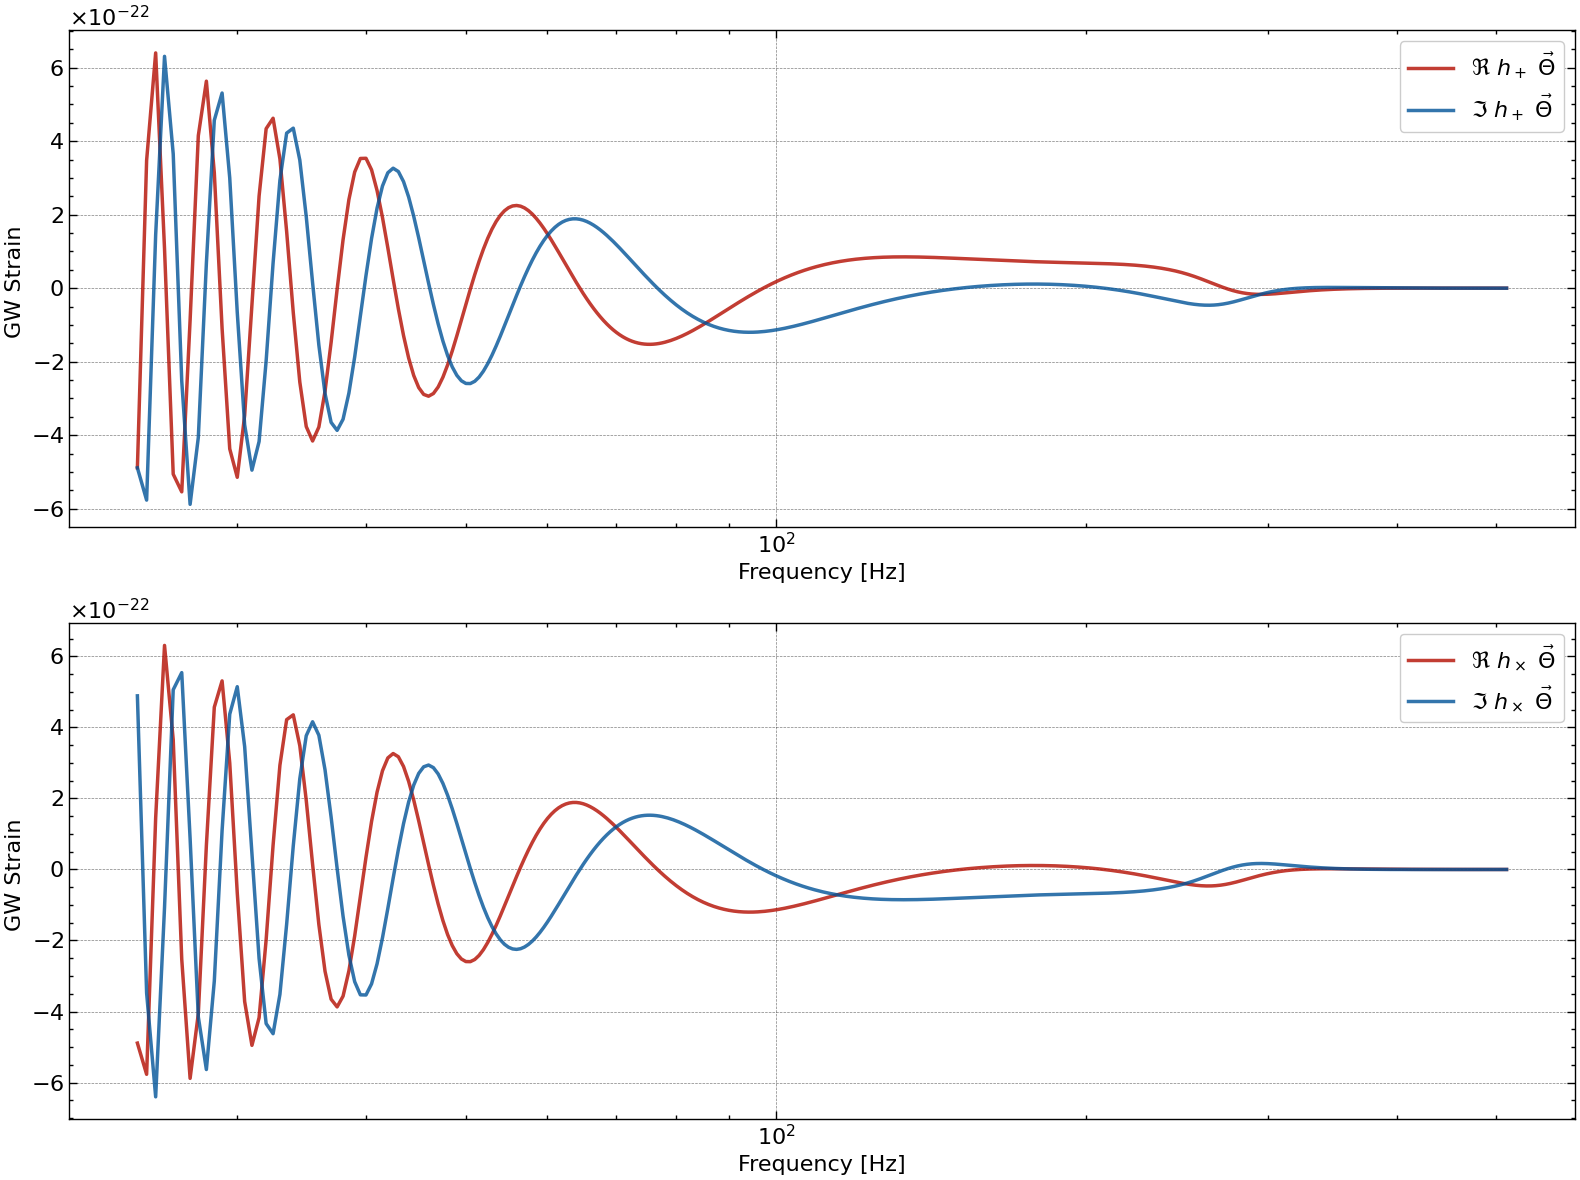

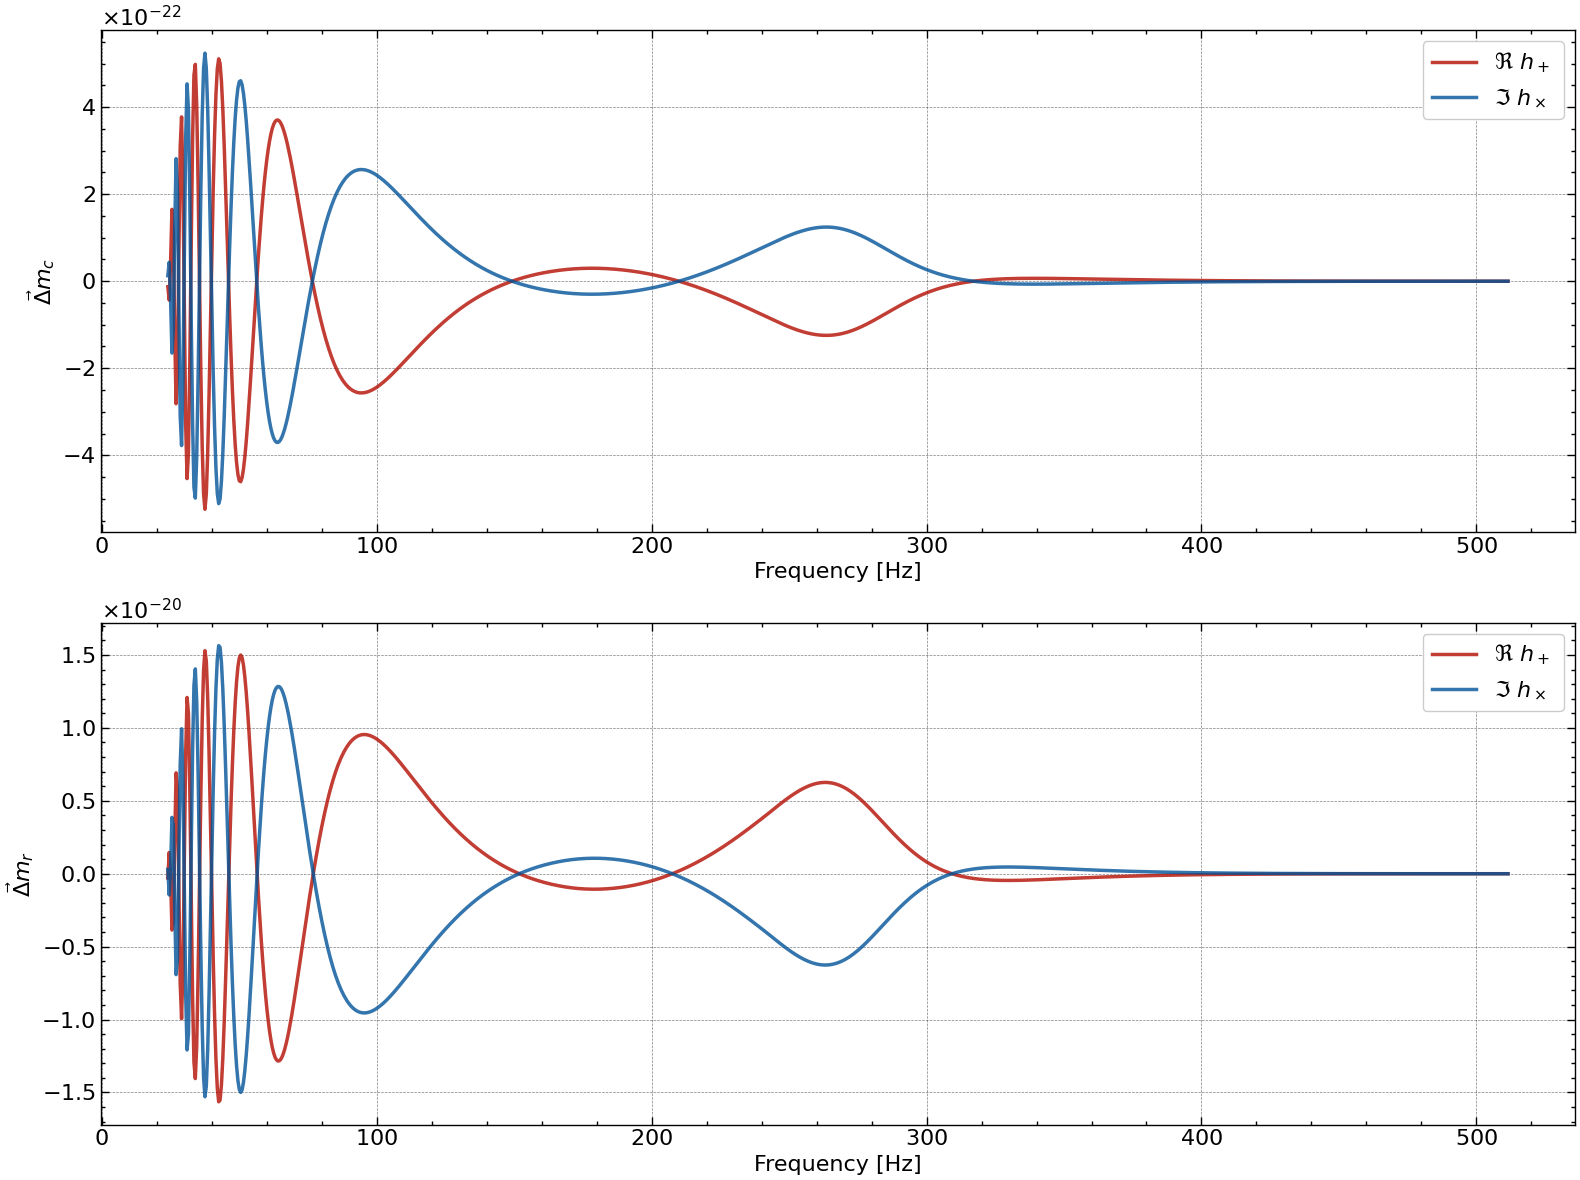

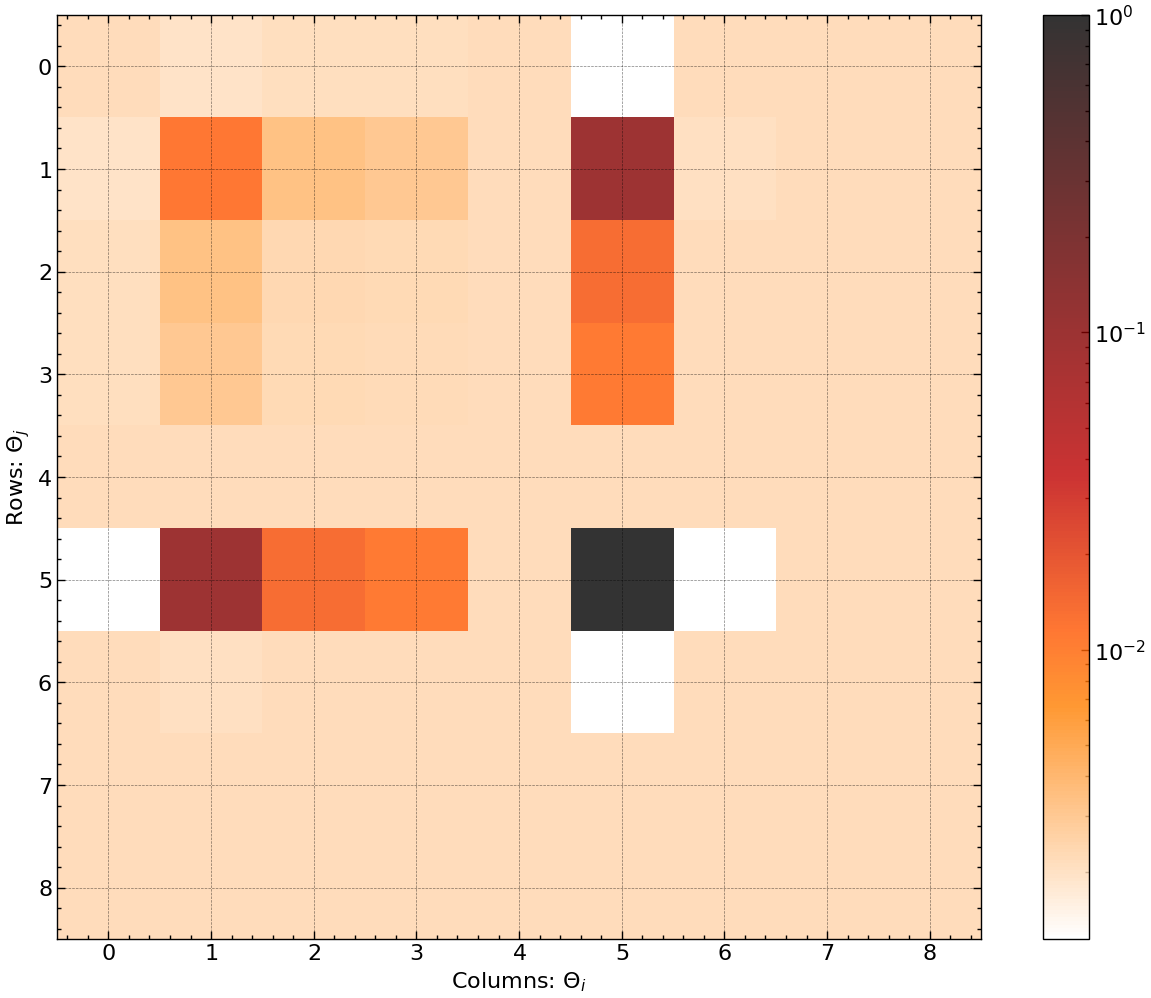

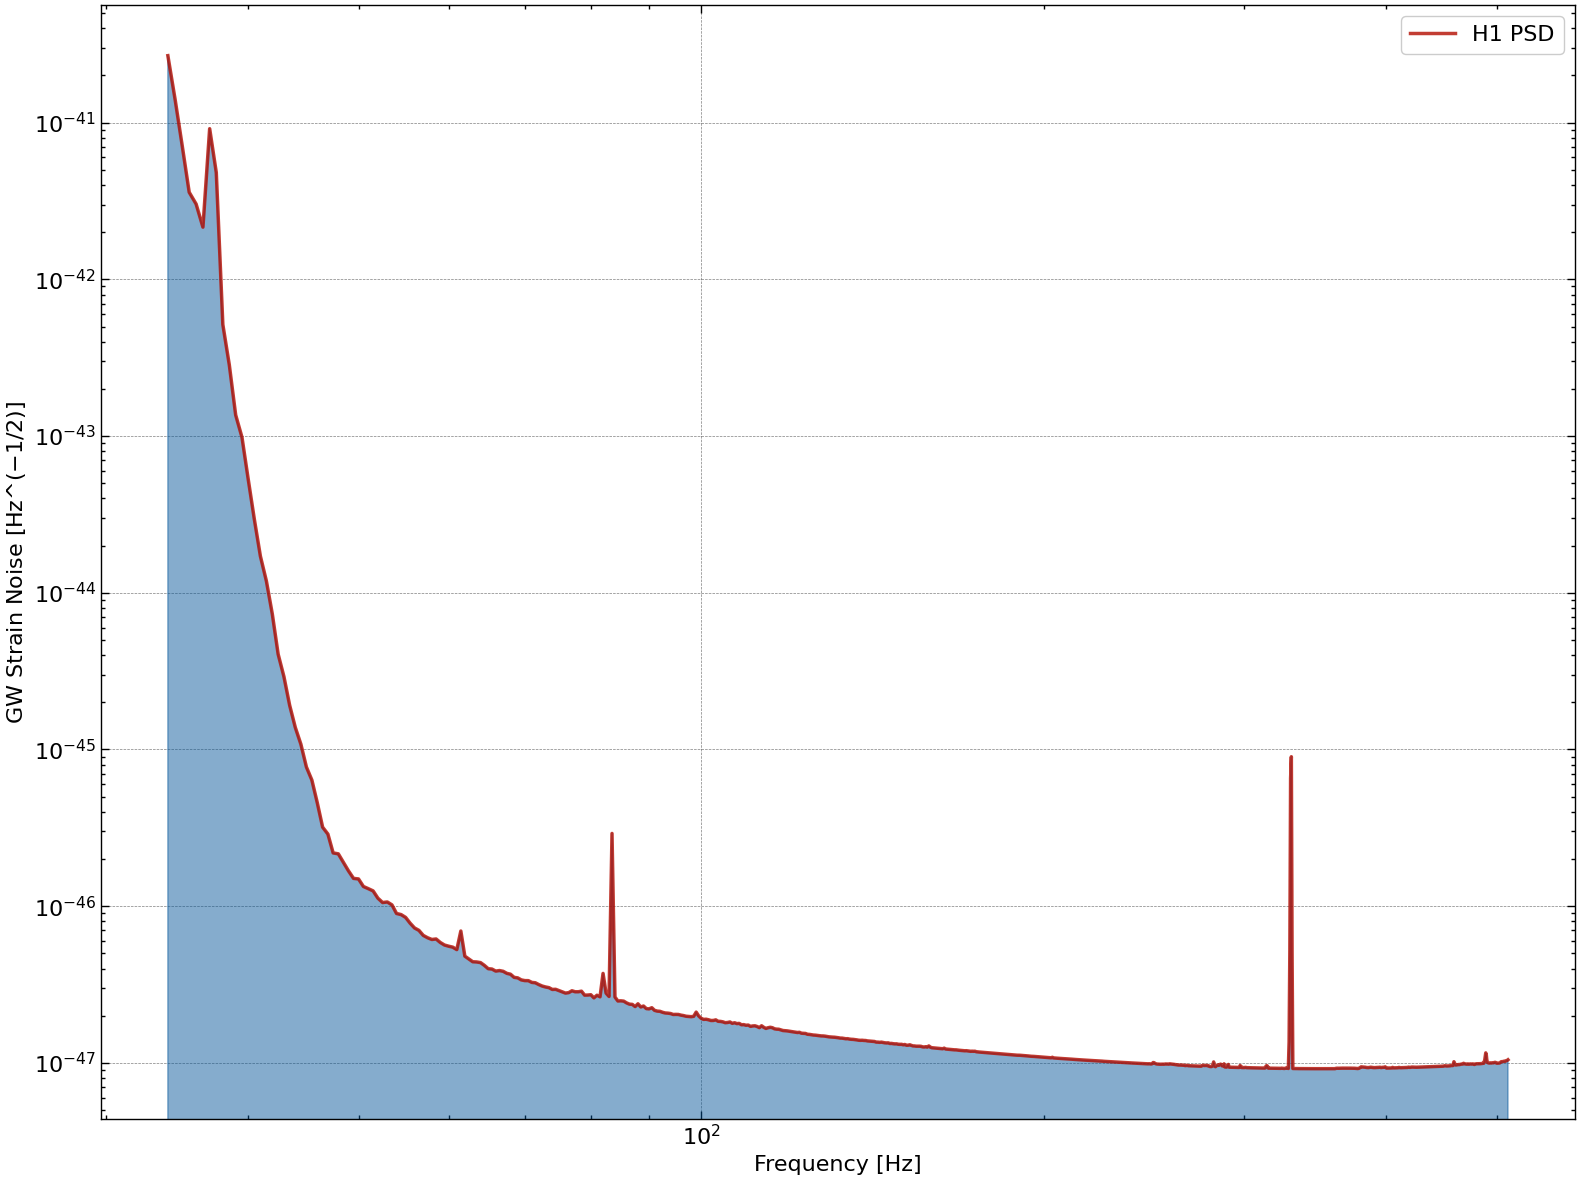

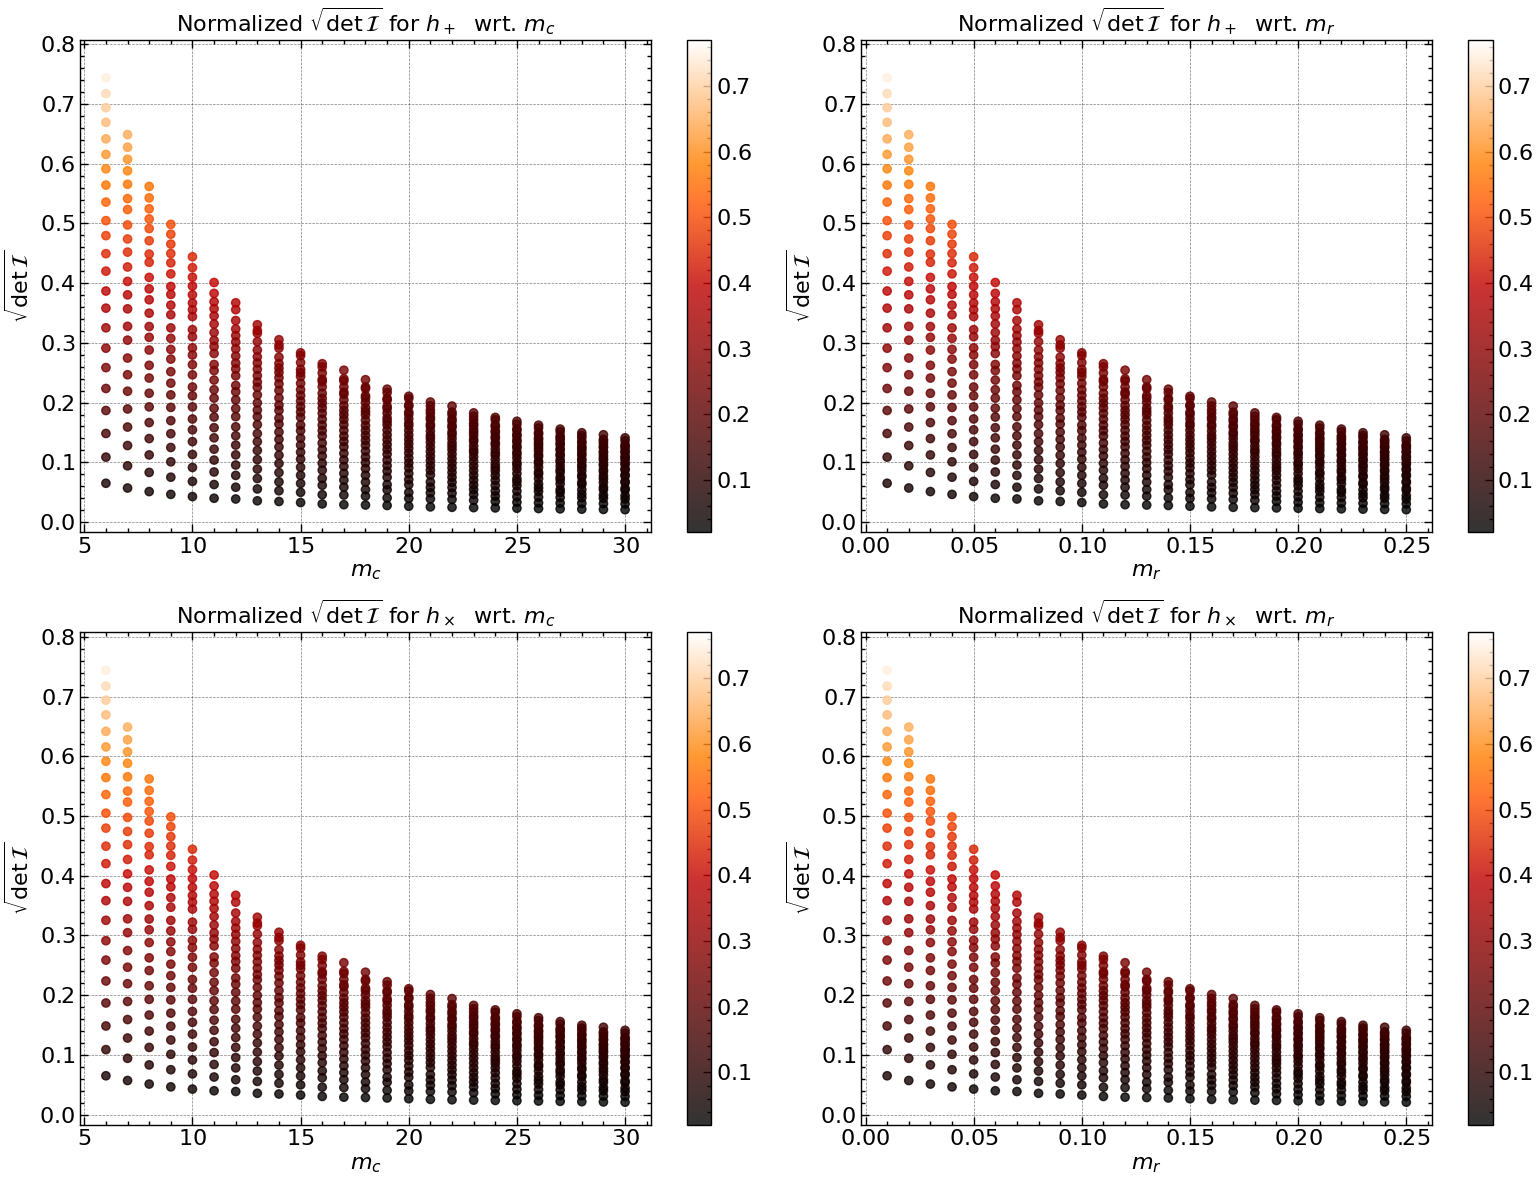

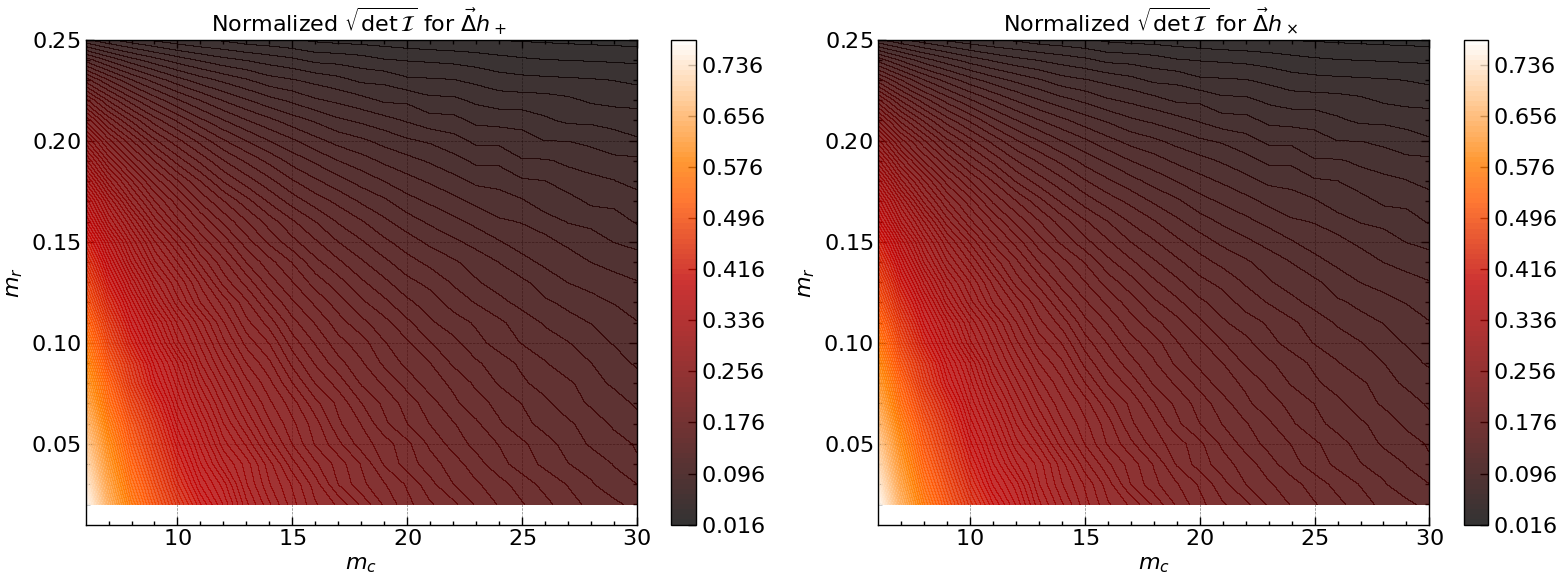

In [7]:
# Section 3 - Plot generation
# Mock waveform and grad
gw_plotter.ripple_waveform_plot(mock_hp, mock_hc, f_sig)
gw_plotter.ripple_grad_plot_idx(mock_hp_grad, mock_hc_grad, f_sig, *mock_idx)
# Mock waveform fim and indexed psd
gw_plotter.fim_plot(mock_fim)
gw_plotter.bilby_plot(f_sig, f_psd)
# Generated fim and contour
gw_plotter.fim_param_2d(data_fim_hp_repo, data_fim_hc_repo, mc_repo, mr_repo)
# gw_plotter.fim_param_3d(data_fim_hp_repo, data_fim_hc_repo, mc_repo, mr_repo)
gw_plotter.fim_contour_mc_mr(data_fim_hp_repo, data_fim_hc_repo, mc_repo, mr_repo)